In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ddos-datasets/ddos_imbalanced/unbalaced_20_80_dataset.csv
/kaggle/input/ddos-datasets/ddos_balanced/final_dataset.csv


In [2]:
import ipaddress                                                                   # converting the IP address form Strings to int
import seaborn as sn                                                               # for data visualisation         
import pandas as pd                                                                # data analysis and manipulation
import matplotlib.pyplot as plt                                                    # for data visualisation  
from matplotlib.pyplot import figure                                               # for data visualisation  
from sklearn.model_selection import train_test_split                               # for splitting the data set
from sklearn.naive_bayes import GaussianNB                                         # building the model
from sklearn.metrics import accuracy_score,precision_score,recall_score
                                                                                   # analysis of the results

In [3]:
import pandas as pd

# Step 1: Determine the total number of rows in the dataset
total_rows = sum(1 for _ in open('/kaggle/input/ddos-datasets/ddos_balanced/final_dataset.csv')) - 1  # Subtract 1 to exclude the header row

# Step 2: Calculate the number of rows to read for 12.5% of the dataset
rows_to_read = total_rows // 8

# Step 3: Read the first 12.5% of the dataset
first_part = pd.read_csv('/kaggle/input/ddos-datasets/ddos_balanced/final_dataset.csv', nrows=rows_to_read)

# Step 4: Calculate the number of rows to skip to read the last 12.5%
rows_to_skip = total_rows - rows_to_read

# Step 5: Read the last 12.5% of the dataset
last_part = pd.read_csv('/kaggle/input/ddos-datasets/ddos_balanced/final_dataset.csv', skiprows=range(1, rows_to_skip + 1))

# Step 6: Concatenate the two parts into a single DataFrame
balance_data = pd.concat([first_part, last_part], ignore_index=True)

# Display the data
print(balance_data)

         Unnamed: 0                                  Flow ID          Src IP  \
0               624     192.168.4.118-203.73.24.75-4504-80-6   192.168.4.118   
1               625     192.168.4.118-203.73.24.75-4504-80-6   192.168.4.118   
2               626     192.168.4.118-203.73.24.75-4505-80-6   192.168.4.118   
3               627     192.168.4.118-203.73.24.75-4505-80-6   192.168.4.118   
4               628     192.168.4.118-203.73.24.75-4506-80-6   192.168.4.118   
...             ...                                      ...             ...   
3198651     1725894   172.31.67.50-209.85.203.113-53598-80-6  209.85.203.113   
3198652     5681778   172.31.69.17-108.174.10.14-54599-443-6    172.31.69.17   
3198653     6395326      172.31.0.2-172.31.65.49-53-61087-17    172.31.65.49   
3198654     4926899      172.31.0.2-172.31.67.58-53-61580-17    172.31.67.58   
3198655     7656685  169.254.169.254-172.31.65.89-80-49393-6    172.31.65.89   

         Src Port           Dst IP  Dst

In [4]:
balance_data

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,624,192.168.4.118-203.73.24.75-4504-80-6,192.168.4.118,4504,203.73.24.75,80,6,12/06/2010 08:34:32 AM,3974862,29,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
1,625,192.168.4.118-203.73.24.75-4504-80-6,192.168.4.118,4504,203.73.24.75,80,6,12/06/2010 08:34:36 AM,63,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
2,626,192.168.4.118-203.73.24.75-4505-80-6,192.168.4.118,4505,203.73.24.75,80,6,12/06/2010 08:34:36 AM,476078,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
3,627,192.168.4.118-203.73.24.75-4505-80-6,192.168.4.118,4505,203.73.24.75,80,6,12/06/2010 08:34:37 AM,151,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
4,628,192.168.4.118-203.73.24.75-4506-80-6,192.168.4.118,4506,203.73.24.75,80,6,12/06/2010 08:34:37 AM,472507,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198651,1725894,172.31.67.50-209.85.203.113-53598-80-6,209.85.203.113,80,172.31.67.50,53598,6,20/02/2018 05:14:52,50,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3198652,5681778,172.31.69.17-108.174.10.14-54599-443-6,172.31.69.17,54599,108.174.10.14,443,6,20/02/2018 03:08:35,306,3,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3198653,6395326,172.31.0.2-172.31.65.49-53-61087-17,172.31.65.49,61087,172.31.0.2,53,17,20/02/2018 01:03:19,362,1,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3198654,4926899,172.31.0.2-172.31.67.58-53-61580-17,172.31.67.58,61580,172.31.0.2,53,17,20/02/2018 12:43:11,303,1,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


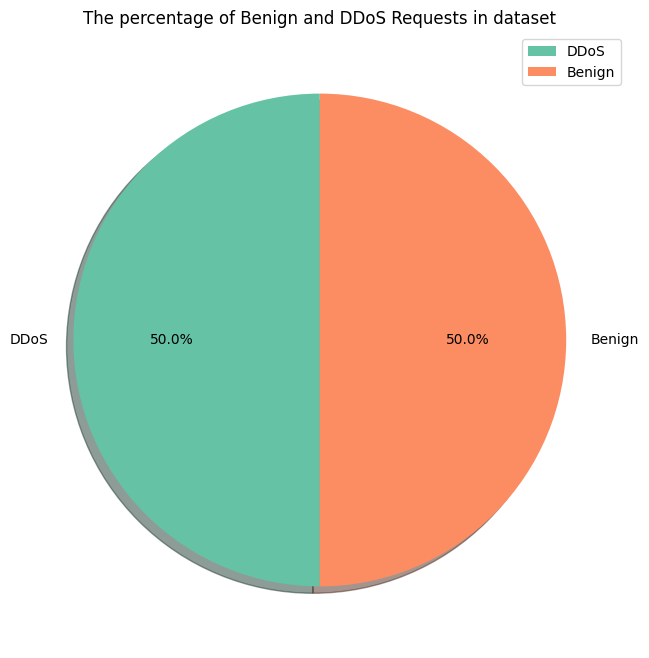

In [5]:
Label = ['DDoS','Benign']
sizes = [balance_data['Label'].value_counts()['ddos'], balance_data['Label'].value_counts()['Benign']]
plt.figure(figsize = (13,8))
colors = sn.color_palette("Set2")
plt.pie(sizes, labels=Label, autopct='%1.1f%%',shadow=True, startangle=90,colors=colors)
plt.legend(['DDoS', 'Benign'])
plt.title('The percentage of Benign and DDoS Requests in dataset')
plt.show()

In [6]:
# find the dtypes of the features
balance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198656 entries, 0 to 3198655
Data columns (total 85 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Flow ID            object 
 2   Src IP             object 
 3   Src Port           int64  
 4   Dst IP             object 
 5   Dst Port           int64  
 6   Protocol           int64  
 7   Timestamp          object 
 8   Flow Duration      int64  
 9   Tot Fwd Pkts       int64  
 10  Tot Bwd Pkts       int64  
 11  TotLen Fwd Pkts    float64
 12  TotLen Bwd Pkts    float64
 13  Fwd Pkt Len Max    float64
 14  Fwd Pkt Len Min    float64
 15  Fwd Pkt Len Mean   float64
 16  Fwd Pkt Len Std    float64
 17  Bwd Pkt Len Max    float64
 18  Bwd Pkt Len Min    float64
 19  Bwd Pkt Len Mean   float64
 20  Bwd Pkt Len Std    float64
 21  Flow Byts/s        float64
 22  Flow Pkts/s        float64
 23  Flow IAT Mean      float64
 24  Flow IAT Std       float64
 25  Flow IAT Max      

In [7]:
# extract the important features and convert Src IP and Dst IP from objects to strings 
balance_data = balance_data[['Flow Duration','Src IP','Src Port','Dst IP','Dst Port','Tot Fwd Pkts','Init Bwd Win Byts','Protocol','Label']]
balance_data = balance_data.astype({'Src IP':'string','Dst IP':'string','Label':'string'}) 
balance_data

,Flow Duration,Src IP,Src Port,Dst IP,Dst Port,Tot Fwd Pkts,Init Bwd Win Byts,Protocol,Label
0,3974862,192.168.4.118,4504,203.73.24.75,80,29,5840,6,ddos
1,63,192.168.4.118,4504,203.73.24.75,80,1,17520,6,ddos
2,476078,192.168.4.118,4505,203.73.24.75,80,2,5840,6,ddos
3,151,192.168.4.118,4505,203.73.24.75,80,2,17520,6,ddos
4,472507,192.168.4.118,4506,203.73.24.75,80,2,5840,6,ddos
...,...,...,...,...,...,...,...,...,...
3198651,50,209.85.203.113,80,172.31.67.50,53598,1,255,6,Benign
3198652,306,172.31.69.17,54599,108.174.10.14,443,3,-1,6,Benign
3198653,362,172.31.65.49,61087,172.31.0.2,53,1,-1,17,Benign
3198654,303,172.31.67.58,61580,172.31.0.2,53,1,-1,17,Benign


In [8]:
# check  the dtypes of the features after converting  
balance_data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198656 entries, 0 to 3198655
Data columns (total 9 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Flow Duration      int64 
 1   Src IP             string
 2   Src Port           int64 
 3   Dst IP             string
 4   Dst Port           int64 
 5   Tot Fwd Pkts       int64 
 6   Init Bwd Win Byts  int64 
 7   Protocol           int64 
 8   Label              string
dtypes: int64(6), string(3)
memory usage: 219.6 MB


In [9]:
# check  for null values in the features  
balance_data.isnull().sum()

Flow Duration        0
Src IP               0
Src Port             0
Dst IP               0
Dst Port             0
Tot Fwd Pkts         0
Init Bwd Win Byts    0
Protocol             0
Label                0
dtype: int64

In [10]:
# top 10 IP addresses with DDoS label
Selected_data=balance_data.loc[balance_data['Label'] == 'ddos'] # row with DDoS label
print(Selected_data['Src IP'].value_counts().nlargest(10))
IPcount=Selected_data['Src IP'].value_counts().nlargest(10).tolist() # times of appearance 
IPs=Selected_data['Src IP'].value_counts()[:10].index.tolist() # the IP 
print(IPcount)
print(IPs)

Src IP
172.31.69.28      245005
18.216.200.189    125859
18.218.229.235    125686
18.218.115.60     125203
18.218.11.51      124881
18.216.24.42      124612
18.219.9.1        124608
18.219.32.43      124590
18.218.55.126     124464
52.14.136.135     124040
Name: count, dtype: Int64
[245005, 125859, 125686, 125203, 124881, 124612, 124608, 124590, 124464, 124040]
['172.31.69.28', '18.216.200.189', '18.218.229.235', '18.218.115.60', '18.218.11.51', '18.216.24.42', '18.219.9.1', '18.219.32.43', '18.218.55.126', '52.14.136.135']


In [11]:
# convert Src IP and Dst IP from strings to int so the classifier can handle it
balance_data['Src IP'] = balance_data['Src IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))
balance_data['Dst IP'] = balance_data['Dst IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))

In [12]:
# check  the dtypes of the features after converting
balance_data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198656 entries, 0 to 3198655
Data columns (total 9 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Flow Duration      int64 
 1   Src IP             int64 
 2   Src Port           int64 
 3   Dst IP             int64 
 4   Dst Port           int64 
 5   Tot Fwd Pkts       int64 
 6   Init Bwd Win Byts  int64 
 7   Protocol           int64 
 8   Label              string
dtypes: int64(8), string(1)
memory usage: 219.6 MB


<Axes: >

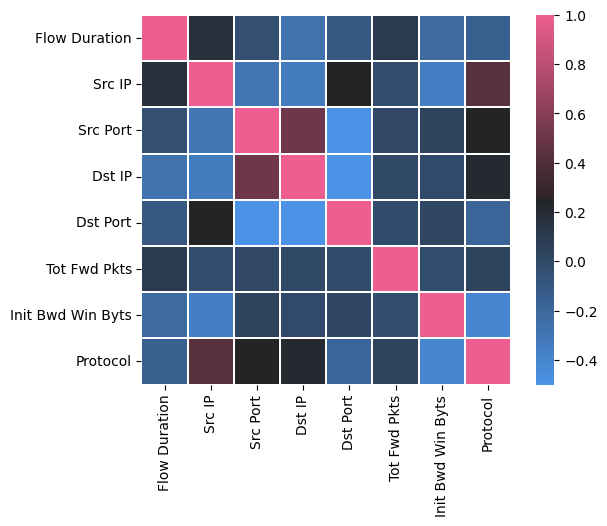

In [13]:
#independent variable Check 
corr = balance_data.iloc[:,:-1].corr(method="pearson")
cmap = sn.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sn.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

In [14]:
# Separating the target variable 
X = balance_data.drop(columns=['Label'])
Y = balance_data.Label

# splitting the data into test and train with test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state =44)

# instantiate the model
classifier = GaussianNB()

# fit the model
classifier.fit(X_train, y_train)

# predict train result
y_pred_train = classifier.predict(X_train)

y_pred_train

# predict test result
y_pred_test = classifier.predict(X_test)

y_pred_test

# accuracy score for the test and train models
print('Training-set accuracy score: {0:0.4f}%'. format(accuracy_score(y_train, y_pred_train)*100))
print('Model accuracy score: {0:0.4f}%'. format(accuracy_score(y_test, y_pred_test)*100))

Training-set accuracy score: 81.9011%
Model accuracy score: 81.8724%
